In [ ]:
"""
example :http://amunategui.github.io/reinforcement-learning/
explain :http://firsttimeprogrammer.blogspot.tw/2016/09/getting-ai-smarter-with-q-learning.html

"""

In [6]:
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt

%matplotlib inline
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

{0: Text(-0.354434,0.431981,'0'),
 1: Text(-0.0580735,0.0736064,'1'),
 2: Text(-0.455083,-0.440573,'2'),
 3: Text(-0.464262,-0.925098,'3'),
 4: Text(1,0.278545,'4'),
 5: Text(0.520616,0.359189,'5'),
 6: Text(0.737108,0.795133,'6'),
 7: Text(-0.925872,-0.572783,'7')}

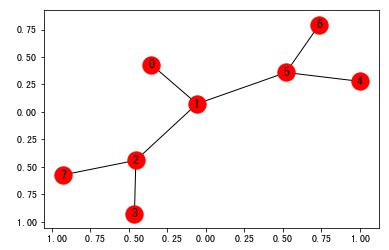

In [13]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,random_state=1)# random_state=1 可重復性
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)


In [14]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [15]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

In [17]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
    else:
      max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 80.0
Score: 280.0
max_value 80.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 80.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 180.0
Score: 200.0
max_value 144.0
Score: 235.555555556
max_value 180.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 144.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 244.0
Score: 232.786885246
max_value 0.0
Score: 232.786885246
max_value 0.0
Score: 232.786885246
max_value 0.0
Score: 232.786885246
max_value 0.0
Score: 232.786885246
max_value 295.2
Score: 209.7560975

Score: 935.395472096
max_value 190.726251164
Score: 946.389306281
max_value 385.926251164
Score: 949.169949851
max_value 238.407813956
Score: 949.169949851
max_value 308.741000932
Score: 951.394464707
max_value 238.407813956
Score: 951.394464707
max_value 308.741000932
Score: 953.618979563
max_value 238.407813956
Score: 953.618979563
max_value 190.726251164
Score: 964.612813748
max_value 482.407813956
Score: 964.612813748
max_value 238.407813956
Score: 964.612813748
max_value 238.407813956
Score: 964.612813748
max_value 238.407813956
Score: 964.612813748
max_value 385.926251164
Score: 964.612813748
max_value 308.741000932
Score: 964.612813748
max_value 190.726251164
Score: 964.612813748
max_value 238.407813956
Score: 964.612813748
max_value 482.407813956
Score: 965.524500164
max_value 308.741000932
Score: 965.524500164
max_value 385.926251164
Score: 965.524500164
max_value 308.741000932
Score: 967.74901502
max_value 308.741000932
Score: 967.74901502
max_value 238.407813956
Score: 967.7

max_value 399.032859344
Score: 976.00265674
max_value 252.310651185
Score: 976.00265674
max_value 399.032859344
Score: 976.00265674
max_value 315.388313982
Score: 976.00265674
max_value 252.310651185
Score: 976.00265674
max_value 499.032859344
Score: 975.578226882
max_value 399.226287475
Score: 975.616987482
max_value 315.388313982
Score: 975.616987482
max_value 315.388313982
Score: 975.616987482
max_value 319.38102998
Score: 975.647995962
max_value 315.388313982
Score: 975.647995962
max_value 399.226287475
Score: 976.648109462
max_value 399.226287475
Score: 976.648109462
max_value 499.032859344
Score: 976.696560213
max_value 399.226287475
Score: 976.735320813
max_value 399.226287475
Score: 976.735320813
max_value 201.848520948
Score: 976.735320813
max_value 319.38102998
Score: 976.735320813
max_value 399.226287475
Score: 976.735320813
max_value 252.310651185
Score: 976.735320813
max_value 399.226287475
Score: 976.735320813
max_value 252.310651185
Score: 976.735320813
max_value 499.226

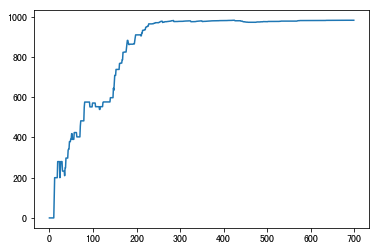

In [18]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)


In [19]:
# Version 2.0, with Environmental Details


{'1': Text(-0.0320944,-0.0893839,'1'),
 '2 - Bees': Text(-0.543432,0.239464,'2 - Bees'),
 '3': Text(-1,0.205902,'3'),
 '4 - Smoke': Text(0.963221,0.088716,'4 - Smoke'),
 '5 - Smoke': Text(0.574585,-0.14863,'5 - Smoke'),
 '6 - Smoke': Text(0.915067,-0.456321,'6 - Smoke'),
 '7 - Beehive': Text(-0.701465,0.664158,'7 - Beehive'),
 'Start': Text(-0.175881,-0.503905,'Start')}

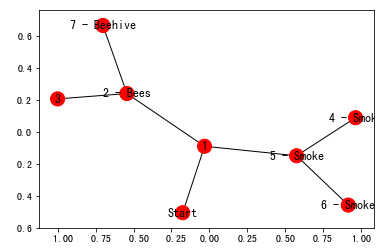

In [21]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H,random_state=1)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)


In [24]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_bees[current_state, action] += 1

    if 's' in environment: 
        enviro_smoke[current_state, action] += 1

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 244.0
max_value 195.2
max_value 0.0
max_value 0.0
max_value 0.0
max_value 64.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 256.16
max_value 0.0
max_value 204.928
max_value 0.0
max_value 204.928
max_value 163.9424
max_value 204.928
max_value 0.0
max_value 0.0
max_value 0.0
max_value 163.9424
max_value 204.928
max_value 204.928
max_value 0.0
max_value 163.9424
max_value 131.15392
max_value 204.928
max_value 131.15392
max_value 131.15392
max_value 204.928
max_value 131.15392
max_value 204.928
m

max_value 0.0
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


 382.407813956
Score: 783.155856696
max_value 244.741000932
Score: 783.155856696
max_value 302.407813956
Score: 783.155856696
max_value 478.009767444
Score: 784.305949961
max_value 382.407813956
Score: 784.305949961
max_value 382.407813956
Score: 784.305949961
going from: [1 4 6]
to: [1]
max_value 305.926251164
Score: 784.305949961
going from: [1 4 6]
to: [1]
max_value 305.926251164
Score: 784.305949961
max_value 382.407813956
Score: 785.226024572
going from: [1 4 6]
to: [1]
max_value 305.926251164
Score: 785.226024572
max_value 305.926251164
Score: 785.962084262
max_value 382.407813956
Score: 785.962084262
going from: [0 2 5]
to: [0 2]
max_value 382.407813956
Score: 785.962084262
max_value 305.926251164
Score: 785.962084262
going from: [1 4 6]
to: [1]
max_value 305.926251164
Score: 785.962084262
max_value 382.407813956
Score: 785.962084262
max_value 244.741000932
Score: 805.542981412
max_value 305.926251164
Score: 805.542981412
max_value 244.741000932
Score: 805.542981412
max_value 24

max_value 253.048520948
Score: 843.876262087
max_value 398.111053407
Score: 843.876262087
max_value 316.310651185
Score: 843.876262087
going from: [1 4 6]
to: [1]
max_value 316.310651185
Score: 843.876262087
max_value 398.111053407
Score: 843.876262087
max_value 316.310651185
Score: 843.876262087
going from: [0 2 5]
to: [0 2]
max_value 253.048520948
Score: 845.544066878
max_value 316.310651185
Score: 845.544066878
max_value 398.111053407
Score: 845.544066878
going from: [0 2 5]
to: [0 2]
max_value 398.111053407
Score: 846.090679809
max_value 498.488842725
Score: 845.619974339
max_value 318.488842725
Score: 846.056933275
max_value 318.488842725
Score: 846.49389221
max_value 253.048520948
Score: 846.49389221
max_value 253.048520948
Score: 846.49389221
max_value 398.79107418
Score: 846.630308658
max_value 498.488842725
Score: 846.706095574
max_value 398.79107418
Score: 846.706095574
max_value 253.048520948
Score: 846.706095574
max_value 498.79107418
Score: 846.253645477
going from: [1 4 6

going from: [1 4 6]
to: [1]
max_value 319.988849627
Score: 849.570318803
max_value 499.986062034
Score: 849.565094914
going from: [0 2 5]
to: [0 2]
max_value 399.986062034
Score: 849.565094914
max_value 399.986062034
Score: 849.565094914
going from: [0 2 5]
to: [0 2]
max_value 399.986062034
Score: 849.565094914
max_value 399.986062034
Score: 849.565094914
max_value 499.988849627
Score: 849.560915856
max_value 319.988849627
Score: 849.569319793
max_value 499.991079702
Score: 849.567230982
max_value 255.991079702
Score: 849.570891505
max_value 499.991079702
Score: 849.571337528
max_value 319.988849627
Score: 849.571337528
max_value 319.988849627
Score: 849.571337528
max_value 319.988849627
Score: 849.571337528
going from: [0 2 5]
to: [0 2]
max_value 399.992863762
Score: 849.572697898
going from: [1 4 6]
to: [1]
max_value 319.994291009
Score: 849.573786194
max_value 255.995432807
Score: 849.57465683
going from: [0 2 5]
to: [0 2]
max_value 399.992863762
Score: 849.57465683
max_value 255.99

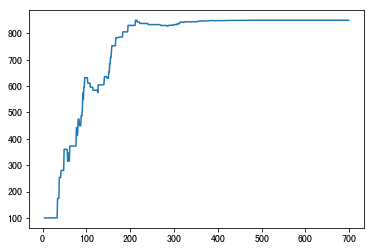

In [25]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

plt.plot(scores)
